# lecture01_金融数据图形展示
B站链接：https://www.bilibili.com/watchlater/#/av20727707

**几个主要的知识点：**
- datatime时间格式的转换
- 柱状图、折线图、饼图的常用作图设置

## 画GDP的柱状图（1）
1. 将数据保存到list数据结构中  `数据来源: 国家统计局网站`

In [1]:
list_year = []
for x in range(2006,2018):
    list_year.append(x)
list_year

[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

In [2]:
list_gdp = [219438.50, 270232.30, 319515.50, 
            349081.40, 413030.30, 489300.60, 540367.40, 
           595244.40, 643974.00, 689052.10, 
           744127.20, 827122.00]

2. 使用matplotlib画图

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

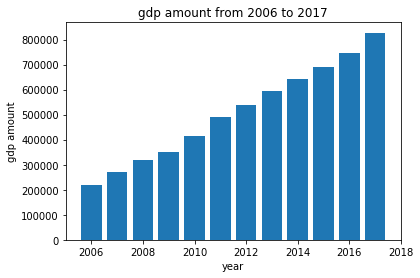

In [4]:
# 画柱状图
plt.bar(list_year, list_gdp)

# 标识标题及坐标轴信息
plt.title('gdp amount from 2006 to 2017')
plt.xlabel('year')
plt.ylabel('gdp amount')

plt.show()

## 画上证指数折线图

In [5]:
import tushare as ts
import matplotlib.pyplot as plt
import datetime

In [50]:
# 使用tushare模块的get_hist_data()方法获取上证指数从2017年10月到2017年12月的历史行情数据：
date = ts.get_hist_data('sh',start='2017-10-01',end='2017-12-01').sort_index()
date.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2017-10-09,3403.25,3410.17,3374.38,3366.97,1917360.62,25.44,0.76,3350.362,3352.654,3362.748,1523516.70,1691388.70,1937210.16
2017-10-10,3373.34,3384.03,3382.99,3358.80,1794238.38,8.61,0.26,3358.244,3355.269,3362.682,1617107.18,1679682.85,1918645.61
2017-10-11,3381.49,3395.78,3388.28,3379.16,1814767.00,5.29,0.16,3366.846,3357.497,3362.826,1693886.68,1668962.89,1894838.57
2017-10-12,3385.53,3390.20,3386.10,3372.53,1618093.75,-2.18,-0.06,3376.138,3360.326,3363.856,1718616.83,1633323.56,1865183.92
2017-10-13,3384.49,3395.75,3390.52,3383.24,1399547.62,4.42,0.13,3384.454,3364.125,3365.120,1708801.47,1594044.31,1835958.71


In [48]:
date.index

Index(['2017-10-09', '2017-10-10', '2017-10-11', '2017-10-12', '2017-10-13',
       '2017-10-16', '2017-10-17', '2017-10-18', '2017-10-19', '2017-10-20',
       '2017-10-23', '2017-10-24', '2017-10-25', '2017-10-26', '2017-10-27',
       '2017-10-30', '2017-10-31', '2017-11-01', '2017-11-02', '2017-11-03',
       '2017-11-06', '2017-11-07', '2017-11-08', '2017-11-09', '2017-11-10',
       '2017-11-13', '2017-11-14', '2017-11-15', '2017-11-16', '2017-11-17',
       '2017-11-20', '2017-11-21', '2017-11-22', '2017-11-23', '2017-11-24',
       '2017-11-27', '2017-11-28', '2017-11-29', '2017-11-30', '2017-12-01'],
      dtype='object', name='date')

In [44]:
# date['close']

In [49]:
# datetime数据格式的转换

list_tradedate = date.index.tolist()
# list_tradeday
list_tradedate1 = []
for date in list_tradedate:
    dt_tradedate = datetime.datetime.strptime(
                                str(date), '%Y-%m-%d')
    list_tradedate1.append(dt_tradedate)


In [51]:
list_closeprice = date['close'].tolist()
# list_closeprice

No handles with labels found to put in legend.


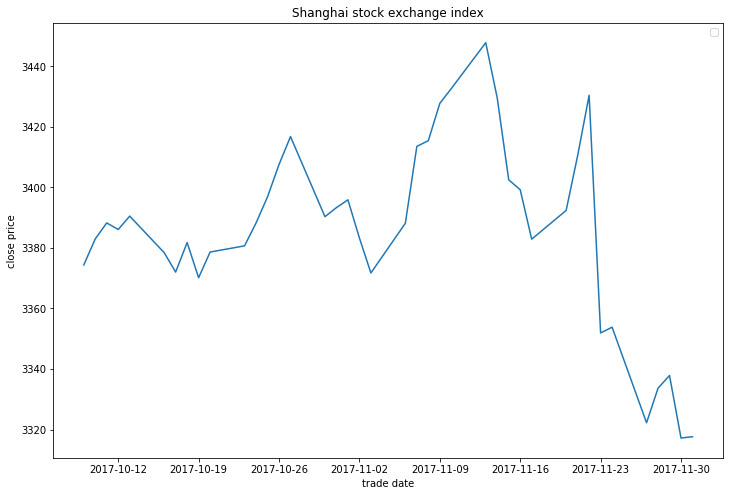

In [62]:
# 先确认画框大小，再作图
plt.figure(figsize=(12,8))
# 画折线图
plt.plot(list_tradedate1, list_closeprice)

plt.title('Shanghai stock exchange index')
plt.xlabel('trade date')
plt.ylabel('close price')


plt.show()

## 画中国2017年GDP的构成饼图

In [8]:
# 数据来源：新闻报道
gdp_2017 = {
    'primary industry' : 65468,
    'secondary industry' : 334623,
    'tertiary industry' : 427032
}

In [9]:
# 分别取出 gdp类别列表 和 gdp值列表
labels = gdp_2017.keys()
values = gdp_2017.values()

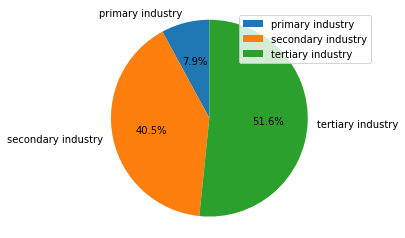

In [13]:
# plt.figure(figsize-(6,6))

# 画饼图
# startangle表示饼图的起始角度
plt.pie(values,
       labels=labels,
       autopct='%.1f%%',
       startangle=90
       )
# 设置样式
plt.axis('equal')
# 显示图例
plt.legend()

plt.show()